In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import sklearn.linear_model
import sklearn.preprocessing
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
permits = pd.read_csv('permits.csv')
permits.shape

(76892, 17)

In [3]:
permits.Permit_approved = pd.to_datetime(permits.Permit_approved)
permits.Permit_submitted = pd.to_datetime(permits.Permit_submitted)
permits = permits.set_index(permits.Permit_approved).sort_index()

In [4]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76892 entries, 2016-01-04 to 2021-12-30
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Permit_approved       76892 non-null  datetime64[ns]
 1   Status_Date           76892 non-null  object        
 2   Status                76892 non-null  int64         
 3   API_NO.               76892 non-null  int64         
 4   Operator_Name_Number  76892 non-null  object        
 5   Lease_Name            76892 non-null  object        
 6   Well                  76892 non-null  object        
 7   District              76892 non-null  object        
 8   County                76892 non-null  object        
 9   Wellbore_Profile      76892 non-null  object        
 10  Filing_Purpose        76892 non-null  object        
 11  Amend                 76892 non-null  object        
 12  Total_Depth           76892 non-null  int64         
 13 

- Approval_time is an object, should be datetime or integer/float

In [5]:
# permits.Approval_time = pd.to_datetime(permits.Approval_time)
# this code won't work bc it's in string format--i resolved by addressing it in the wrangle module

In [6]:
permits.head(1)

,Permit_approved,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,Current_Queue,Permit_submitted,Approval_time_days,SHALE
Permit_approved,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,N,13606,APPROVED,2016-01-04,0,EAGLE FORD


In [7]:
permits.describe()

,Status,API_NO.,Total_Depth,Approval_time_days
count,76892.000000,7.689200e+04,76892.000000,76892.000000
mean,842509.209294,2.950391e+07,9954.407780,12.629870
std,22431.405938,1.289433e+07,3732.362647,33.585786
min,70969.000000,1.008200e+05,150.000000,0.000000
25%,827731.750000,2.253134e+07,8000.000000,3.000000
50%,843171.000000,3.174117e+07,10000.000000,6.000000
75%,858770.250000,3.893654e+07,12000.000000,13.000000
max,875615.000000,7.063026e+07,28010.000000,2989.000000


In [8]:
permits.index.min(), permits.index.max(), permits.index.max()-permits.index.min()

(Timestamp('2016-01-04 00:00:00'),
 Timestamp('2021-12-30 00:00:00'),
 Timedelta('2187 days 00:00:00'))

- from the beginning of 2016 to the end of 2021

In [9]:
permits.Current_Queue.value_counts()

APPROVED    76892
Name: Current_Queue, dtype: int64

- all rows are in approved status

In [10]:
permits.isna().sum()

Permit_approved         0
Status_Date             0
Status                  0
API_NO.                 0
Operator_Name_Number    0
Lease_Name              0
Well                    0
District                0
County                  0
Wellbore_Profile        0
Filing_Purpose          0
Amend                   0
Total_Depth             0
Current_Queue           0
Permit_submitted        0
Approval_time_days      0
SHALE                   0
dtype: int64

- drop Stacked_Lateral_Parent_Well_DP, which is almost all na's
- drop the very few na's in wellbore and shale
#### Done in the wrangle file

In [11]:
permits.Lease_Name.nunique()

30402

- many duplicated lease names, but we are keeping these bc the same lease name can file multiple times for different wells/reasons

In [12]:
permits.County.value_counts()

REEVES      6447
MIDLAND     6393
MARTIN      5401
HOWARD      3913
LOVING      3902
            ... 
FANNIN         1
BREWSTER       1
DALLAM         1
BELL           1
CORYELL        1
Name: County, Length: 220, dtype: int64

In [13]:
len(permits.County.unique())

220

- there are 220 texas counties represented in this data

In [14]:
permits.head(1)

,Permit_approved,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,Current_Queue,Permit_submitted,Approval_time_days,SHALE
Permit_approved,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,N,13606,APPROVED,2016-01-04,0,EAGLE FORD


array([[<AxesSubplot:title={'center':'Permit_approved'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>],
       [<AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>]],
      dtype=object)

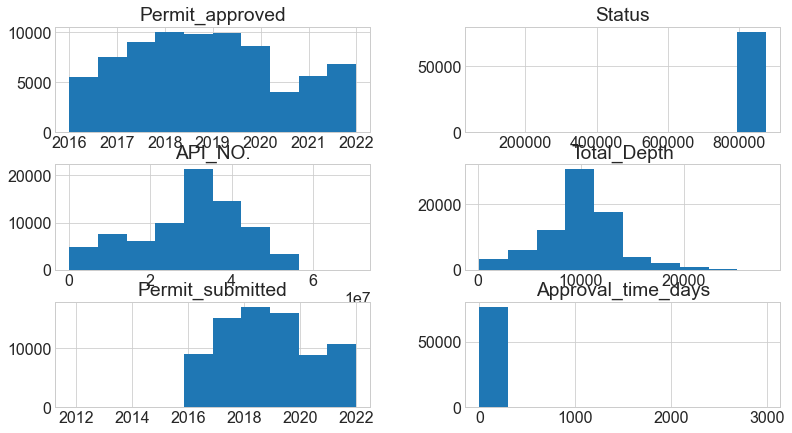

In [15]:
permits.hist()

- well depth is normally distributed
- notice a dropoff in permits in 2020--covid related downturn, for sure
- some of the permits were submitted as early as 2012
- almost all approval times were a matter of a couple of days, with a couple of outliers
- not familiar with the meaning of the status or api number, would be good to investigate

<AxesSubplot:>

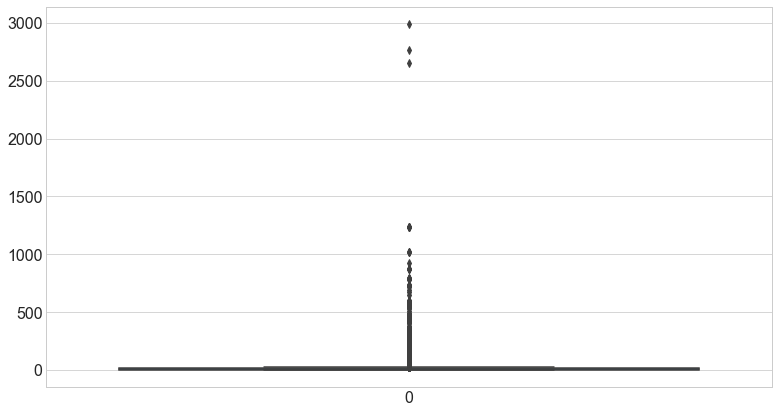

In [16]:
sns.boxplot(data=permits.Approval_time_days)

In [17]:
def remove_outliers(df, k, col_list):
    ''' 
    
    Here, we remove outliers from a list of columns in a dataframe and return that dataframe
    
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

array([[<AxesSubplot:title={'center':'Permit_approved'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>],
       [<AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>]],
      dtype=object)

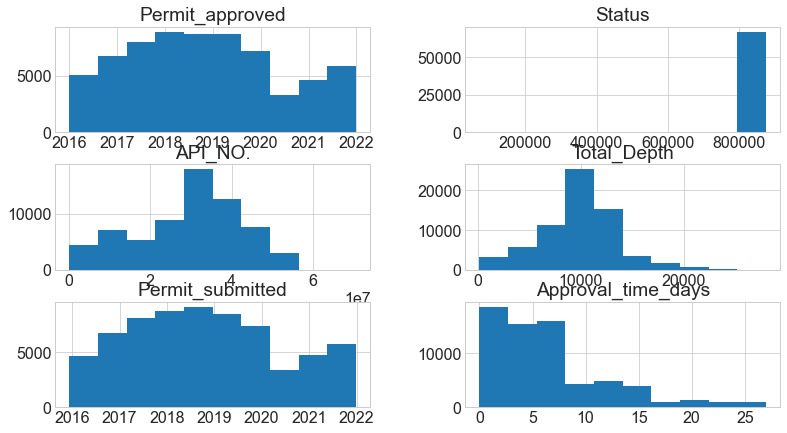

In [18]:
permits = remove_outliers(permits, 1.5, ['Approval_time_days'])
permits.hist()

- the remove outliers feature, which i will implement in the wrangle_module, takes care of those extreme approval times, and hence the early permit submissions

In [20]:
permits.columns

Index(['Permit_approved', 'Status_Date', 'Status', 'API_NO.',
       'Operator_Name_Number', 'Lease_Name', 'Well', 'District', 'County',
       'Wellbore_Profile', 'Filing_Purpose', 'Amend', 'Total_Depth',
       'Current_Queue', 'Permit_submitted', 'Approval_time_days', 'SHALE'],
      dtype='object')

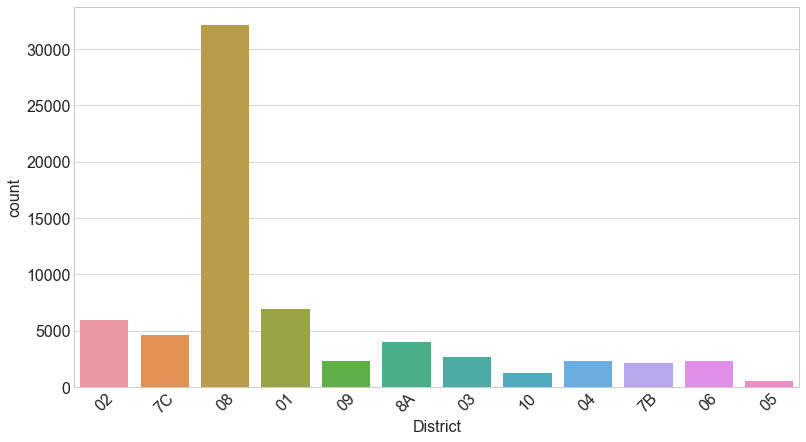

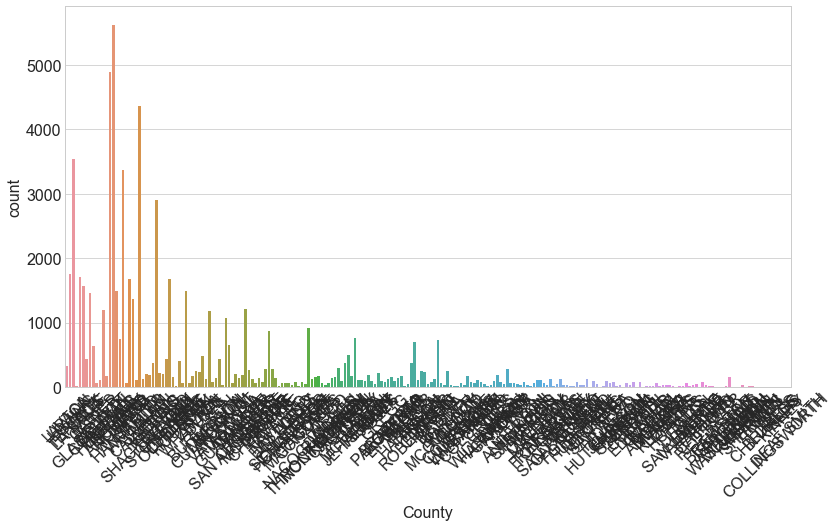

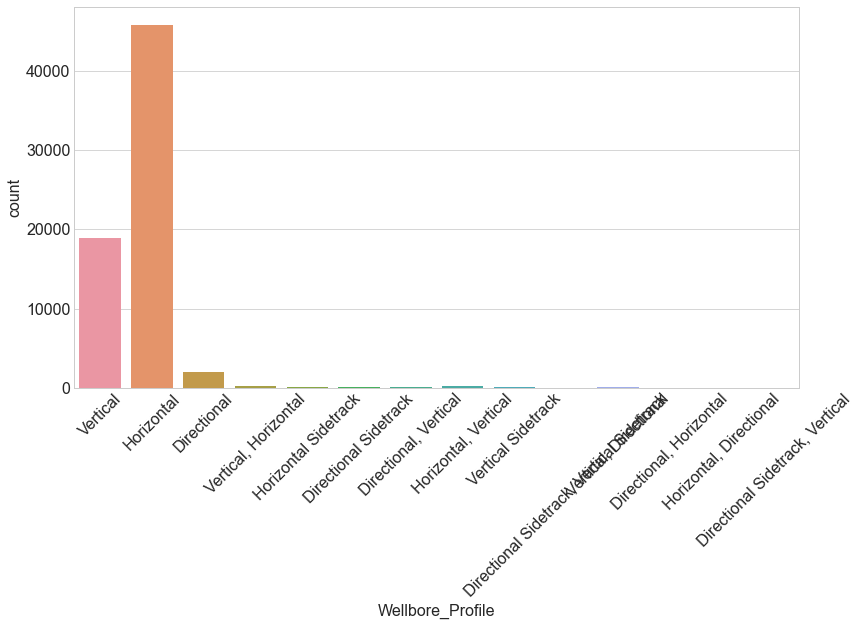

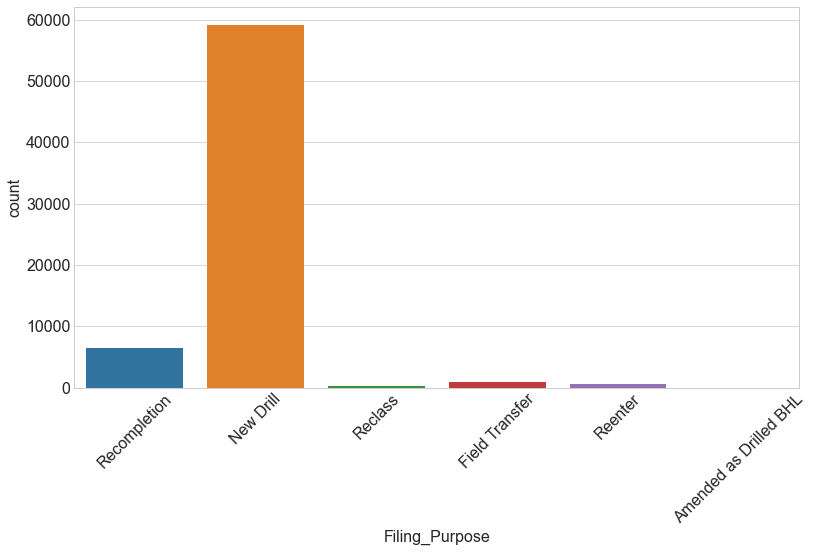

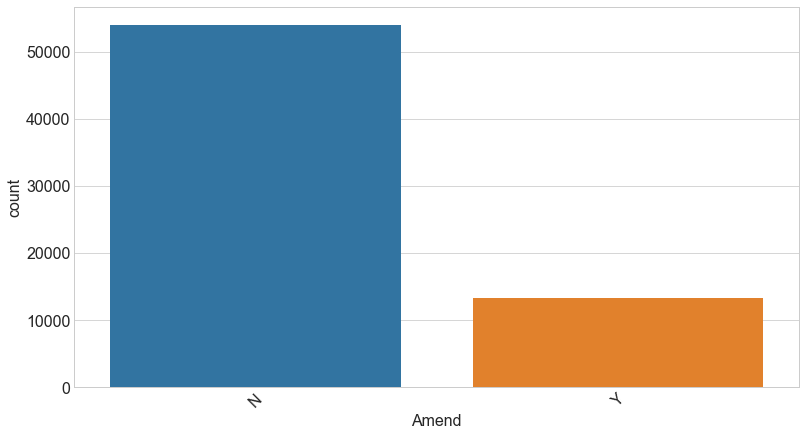

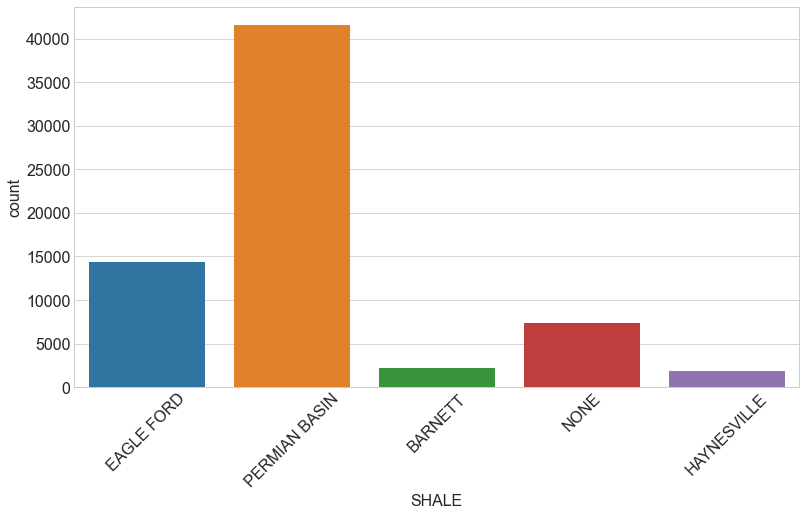

In [24]:
disc_vars = ['District', 'County','Wellbore_Profile', 'Filing_Purpose', 'Amend','SHALE']
for var in disc_vars:
    plt.figure()
    sns.countplot(x=var,data=permits)
    plt.xticks(rotation = 45)

- District 8 is far and away the biggest for drilling permits
- There are six counties with considerably higher permitting--explore this more
- Horizontal wells are surprisingly the most common for permitting, followed by vertical.  Presumably due to the prevalence of fracking
- Almost everything is new drilling--consider dropping the rest of the filing purposes
- Relatively few ammended permits, but enough to take into account. Explo further?
- The Permian is far and away the highest area for permitting, followed by the eagleford shale.  

<AxesSubplot:xlabel='Permit_approved', ylabel='Approval_time_days'>

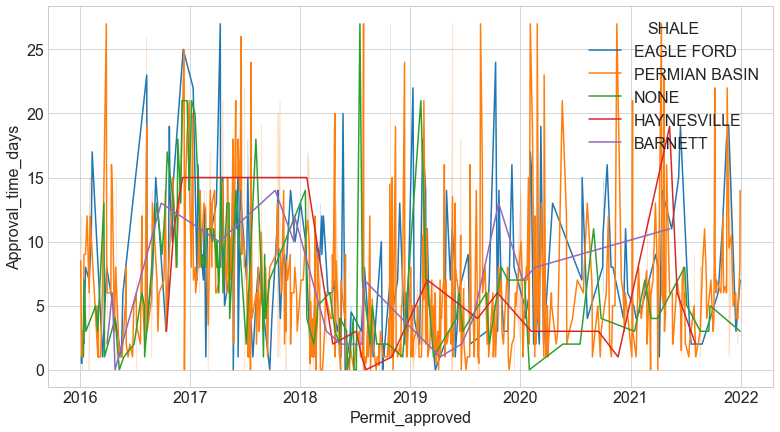

In [38]:
temp = permits.sample(1000)
sns.lineplot(data=temp,x=temp.index, y= 'Approval_time_days', hue = 'SHALE')

- Nothing too helpful in this graph

In [33]:
permits.County.value_counts().tail(50)

UPSHUR           19
JOHNSON          19
FOARD            18
TITUS            18
HALE             17
TRINITY          17
BAYLOR           17
JEFF DAVIS       17
COMANCHE         17
NAVARRO          17
LUBBOCK          17
OLDHAM           17
MOTLEY           16
ARANSAS          14
SHERMAN          13
MORRIS           12
SAN JACINTO      12
TERRELL          12
FALLS            11
LYNN             10
WILLACY          10
MENARD           10
WILLIAMSON        9
RED RIVER         8
GRAY              7
ERATH             6
PRESIDIO          6
MCLENNAN          5
FRANKLIN          5
CAMERON           4
KAUFMAN           4
SAN SABA          3
HALL              3
CHILDRESS         3
HOPKINS           3
HILL              3
SABINE            2
HUNT              2
TRAVIS            2
ELLIS             2
CORYELL           1
BELL              1
DEAF SMITH        1
FANNIN            1
MILLS             1
COLLINGSWORTH     1
BRISCOE           1
BREWSTER          1
FLOYD             1
KINNEY            1


### The top counties by permit requests:
- REEVES      5627
- MIDLAND     4883
- MARTIN      4361
- LOVING      3539
- HOWARD      3364
- KARNES      2903

<AxesSubplot:xlabel='Permit_approved'>

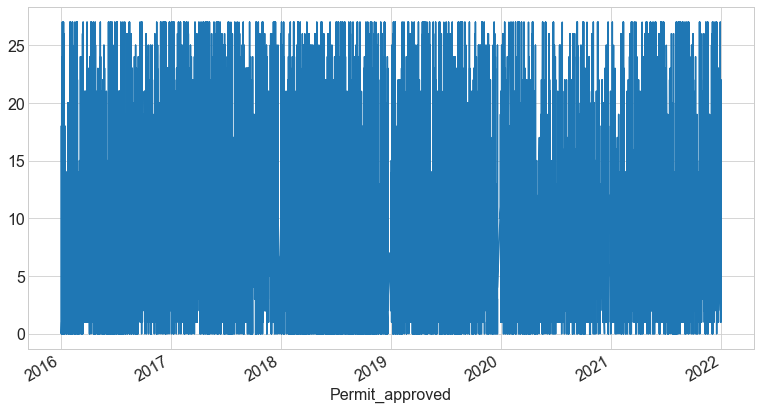

In [43]:
y = permits.Approval_time_days
y.plot()

## Splitting the data here for further explo
- for the time being, i will not pursue the time series analysis perspective and will do a typical split, pending further exploration

In [44]:
def split_permits(df):
    '''
    Takes in the permits dataframe and returns train, validate, test subset dataframes
    '''
    # SPLIT
    # Test set is .2 of original dataframe
    train, test = train_test_split(df, test_size = .2, random_state=123)
    # The remainder is here divided .7 to train and .3 to validate
    train, validate = train_test_split(train, test_size=.3, random_state=123)

    # return train, validate, test

    X_train = train.drop(columns=['Approval_time_days'])
    y_train = pd.DataFrame(train.Approval_time_days, columns=['Approval_time_days'])

    X_validate = validate.drop(columns=['Approval_time_days'])
    y_validate = pd.DataFrame(validate.Approval_time_days, columns=['Approval_time_days'])

    X_test = test.drop(columns=['Approval_time_days'])
    y_test = pd.DataFrame(test.Approval_time_days, columns=['Approval_time_days'])

    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [45]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
split_permits(permits)

In [46]:
train.shape, \
validate.shape, \
test.shape, \
X_train.shape, \
y_train.shape, \
X_validate.shape, \
y_validate.shape, \
X_test.shape, \
y_test.shape

((37718, 17),
 (16166, 17),
 (13471, 17),
 (37718, 16),
 (37718, 1),
 (16166, 16),
 (16166, 1),
 (13471, 16),
 (13471, 1))

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37718 entries, 2018-11-07 to 2017-11-03
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Permit_approved       37718 non-null  datetime64[ns]
 1   Status_Date           37718 non-null  object        
 2   Status                37718 non-null  int64         
 3   API_NO.               37718 non-null  int64         
 4   Operator_Name_Number  37718 non-null  object        
 5   Lease_Name            37718 non-null  object        
 6   Well                  37718 non-null  object        
 7   District              37718 non-null  object        
 8   County                37718 non-null  object        
 9   Wellbore_Profile      37718 non-null  object        
 10  Filing_Purpose        37718 non-null  object        
 11  Amend                 37718 non-null  object        
 12  Total_Depth           37718 non-null  int64         
 13 

### List some variables you want to plot against Approval_time_days
- SHALE
- Total_Depth
- Amend
- Filing_purpose
- Wellbore_Profile
- County
- District

### These are all categorical with the exception of Total_Depth



In [108]:
train[train.District == '05'].Approval_time_days.mean()

7.888178913738019

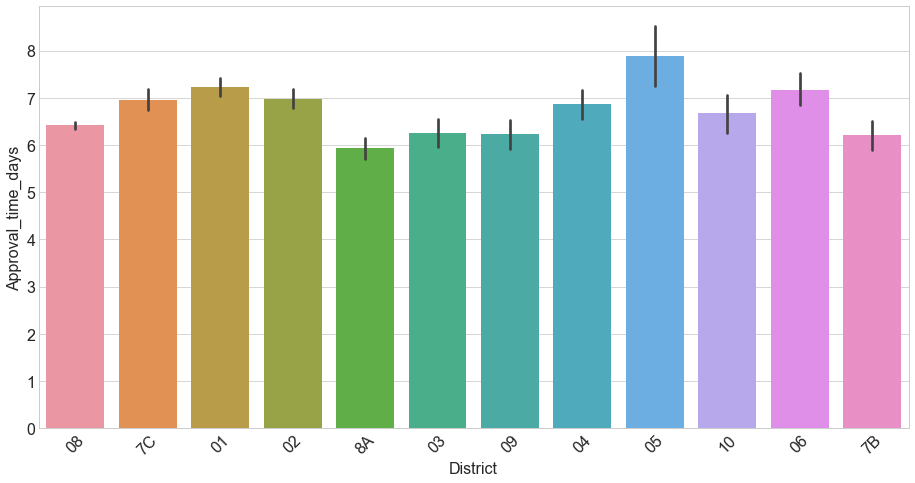

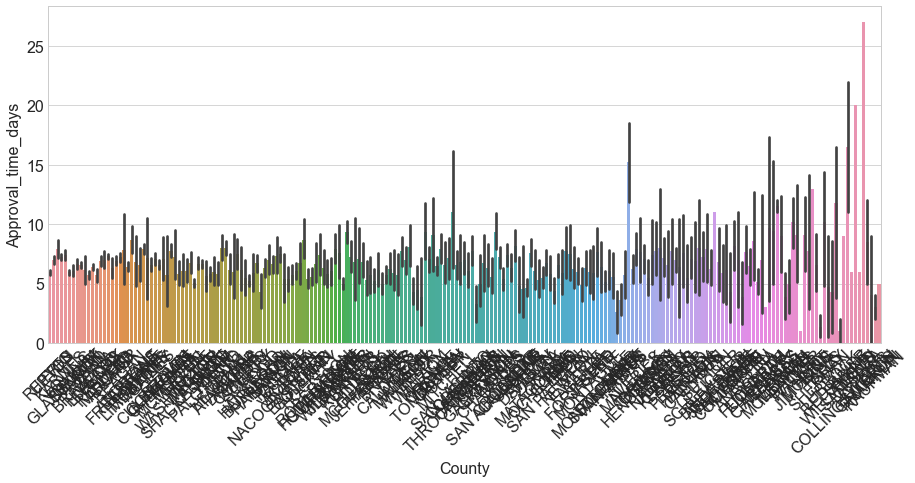

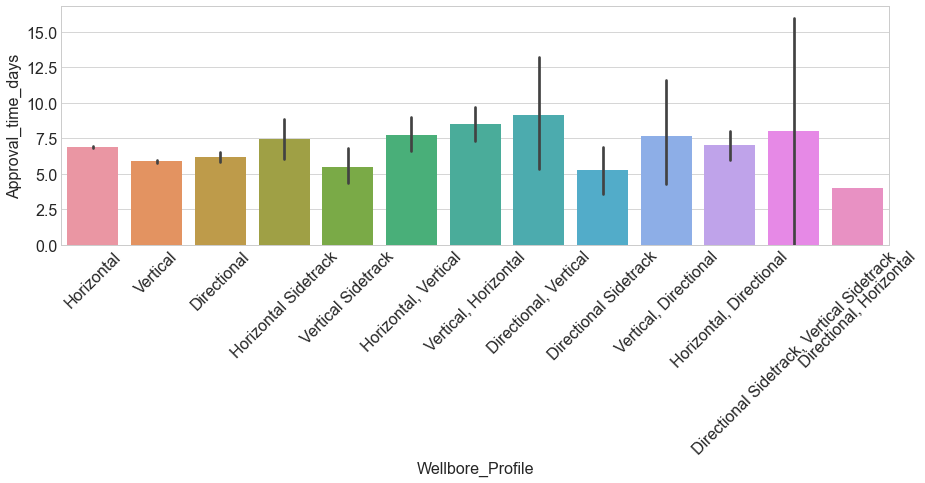

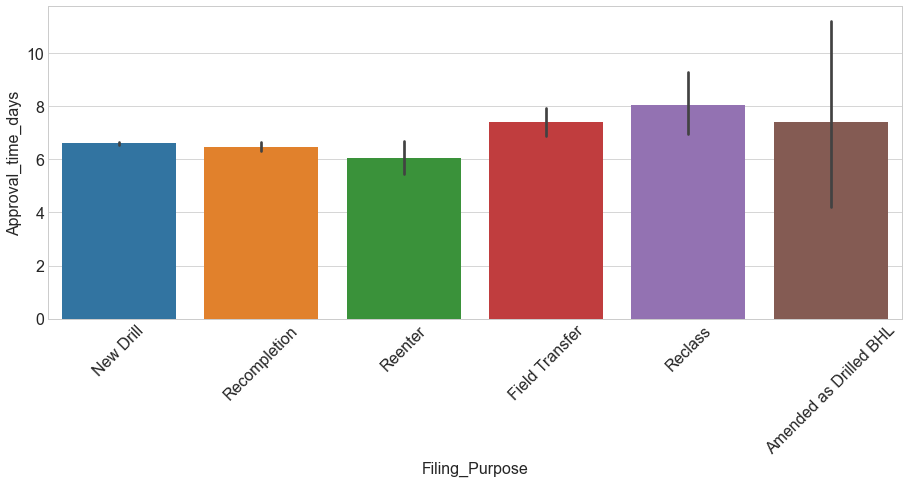

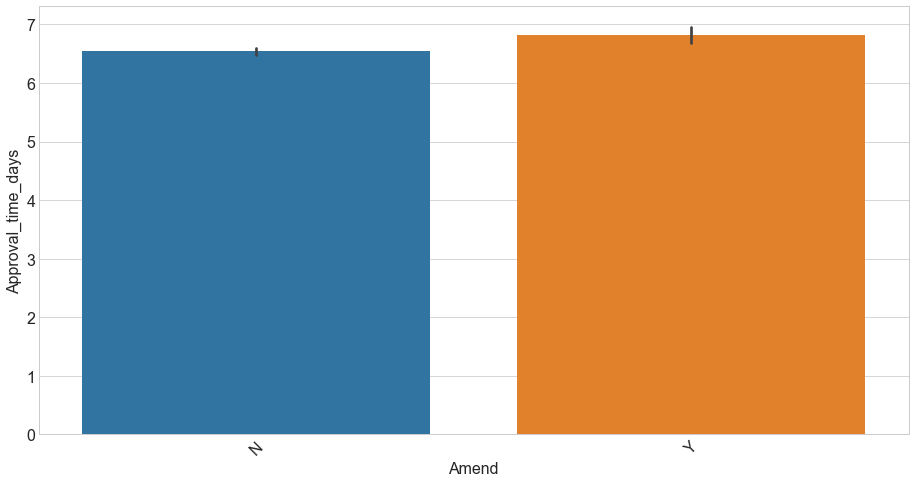

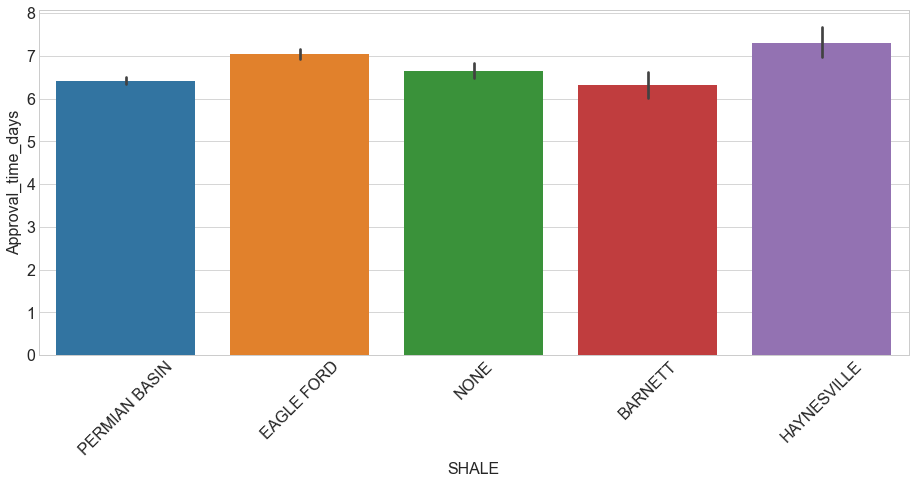

In [105]:
for var in disc_vars:
    plt.figure()
    sns.barplot(y= train.Approval_time_days, x=var,data=train)
    plt.xticks(rotation = 45)
    plt.tight_layout()

- District 5 has a slightly higher approval time, but this would need to be shown with some statistical testing
- There are a few particularly slow counties for permitting, it would be interesting to isolate and explore these
- filing purpose has virtually no relation to approval time, amend as well
- all shales have almost identical approval times; haynesville is a tiny bit more, but stats testing would be required to show this for sure
- directional horizontal wells have a slightly shorter approval time. However, there are only three wellbore profiles with significant numbers: horizontal, vertical, and directional.  To the extent the rest might need to be dropped

In [85]:
train[train.Wellbore_Profile == 'Directional, Horizontal']

,Permit_approved,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,Current_Queue,Permit_submitted,Approval_time_days,SHALE
Permit_approved,,,,,,,,,,,,,,,,,
2018-10-29,2018-10-29,Submitted 10/25/2018 Approved 10/29/2018,846194,25536206,ENCANA OIL & GAS(USA) INC. (251691),BURRIS UNIT,2H,02,KARNES,"Directional, Horizontal",New Drill,N,11000,APPROVED,2018-10-25,4,EAGLE FORD


In [86]:
permits.Wellbore_Profile.value_counts()

Horizontal                                   45791
Vertical                                     18883
Directional                                   2014
Vertical, Horizontal                           182
Horizontal, Vertical                           163
Vertical Sidetrack                              86
Directional Sidetrack                           86
Horizontal Sidetrack                            84
Directional, Vertical                           31
Vertical, Directional                           25
Horizontal, Directional                          4
Directional, Horizontal                          3
Directional Sidetrack, Vertical Sidetrack        2
Directional Sidetrack, Vertical                  1
Name: Wellbore_Profile, dtype: int64

- There are only 3 wellbore profiles of much any significance: horizontal, vertical, and directional

In [101]:
train[train.Approval_time_days > 15].County.value_counts()#.head(10)

MIDLAND     279
REEVES      197
MARTIN      182
KARNES      158
HOWARD      118
           ... 
HARTLEY       1
ZAPATA        1
BEXAR         1
PARKER        1
HANSFORD      1
Name: County, Length: 170, dtype: int64

In [148]:
train.groupby(by='County').Approval_time_days.mean().sort_values().tail(11)

County
DALLAS         10.153846
FALLS          10.200000
BREWSTER       11.000000
SAN JACINTO    11.000000
MCLENNAN       11.500000
RED RIVER      11.750000
HUNT           13.000000
TITUS          15.222222
SABINE         16.500000
FLOYD          20.000000
HOPKINS        27.000000
Name: Approval_time_days, dtype: float64

- The above is the list of counties with mean approval times over ten days

In [126]:
train.groupby(by='County').Approval_time_days.mean().sort_values().head(11)

County
HILL          1.000000
WILLIAMSON    1.000000
SHERMAN       1.333333
HALE          2.600000
KAUFMAN       3.000000
CHILDRESS     3.000000
WALLER        3.300000
LAMB          3.653846
MENARD        3.857143
WILLACY       3.875000
FOARD         3.888889
Name: Approval_time_days, dtype: float64

- And the counties with a mean approval time less than 4 days

- taking a break but i need to find out the number of approvals for these counties, to get a better understanding of why they are at the extremes

In [143]:
quick_counties = \
['HILL',
'WILLIAMSON',
'SHERMAN',
'HALE', 
'KAUFMAN',
'CHILDRESS',
'WALLER',
'LAMB',  
'MENARD',
'WILLACY',
'FOARD']

In [144]:
for county in quick_counties:
    print(len(train[train.County == county]))

2
3
6
10
2
1
20
26
7
8
9


- There are exceedingly few permit approvals for these counties on the bottom end of the approval times

In [149]:
slow_counties = ['DALLAS', 'FALLS', 'BREWSTER', 'SAN JACINTO', 'MCLENNAN', 'RED RIVER',
       'HUNT', 'TITUS', 'SABINE', 'FLOYD', 'HOPKINS']

In [150]:
for county in slow_counties:
    print(len(train[train.County == county]))

13
5
1
7
4
4
2
9
2
1
1


- likewise, there are few observations in the slow counties

In [153]:
len(train[train.County == 'REEVES'])

3191

In [155]:
# train.County.value_counts().tail(30)

<AxesSubplot:xlabel='Approval_time_days', ylabel='Total_Depth'>

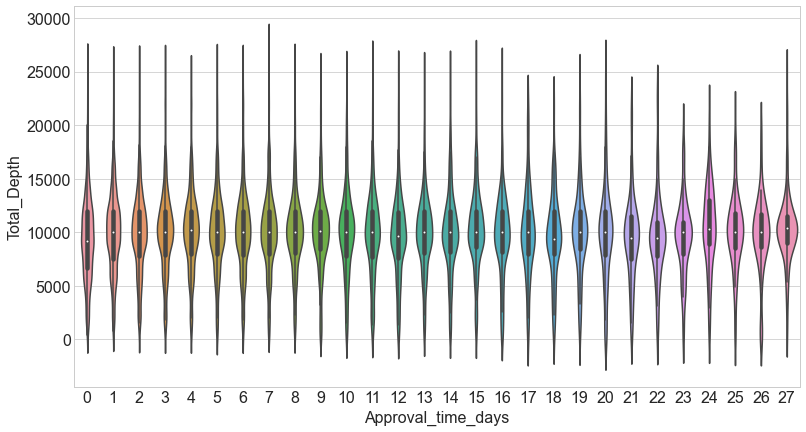

In [60]:
sns.violinplot(data=train, y = 'Total_Depth', x = 'Approval_time_days')

- not a clear conclusion, this would be ripe for a levene then ANOVA test for differing variance

### Running a levene test to check on the variances between the populations above:

- H_0: The variances of the approval times by total depth are the same in all populations
- H_A: The variance in the populations is different

In [65]:
stats.levene(
train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth,
train[train.Approval_time_days==20].Total_Depth,
train[train.Approval_time_days==21].Total_Depth,
train[train.Approval_time_days==22].Total_Depth,
train[train.Approval_time_days==23].Total_Depth,
train[train.Approval_time_days==24].Total_Depth,
train[train.Approval_time_days==25].Total_Depth,
train[train.Approval_time_days==26].Total_Depth,
train[train.Approval_time_days==27].Total_Depth,
)

LeveneResult(statistic=2.9291077993600134, pvalue=5.294306173499092e-07)

- the variances are not equal

### Kruskal-Wallace testing (since the variances are unequal):

- H_O: The population means for the different well depths (by approval time) is the same
- H_a: These population means are different

In [66]:
alpha = .05

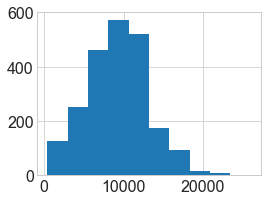

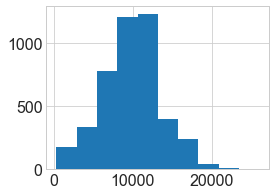

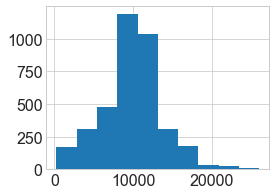

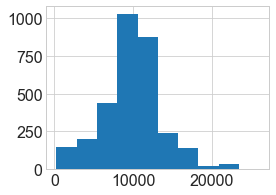

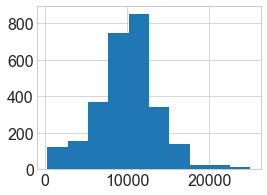

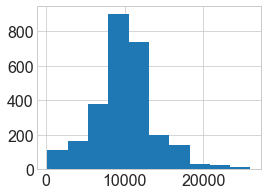

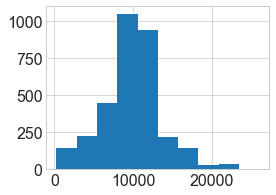

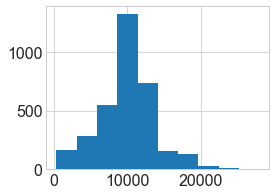

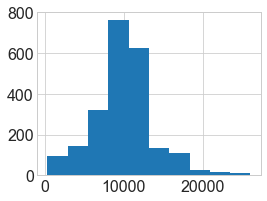

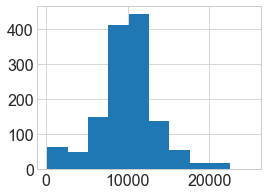

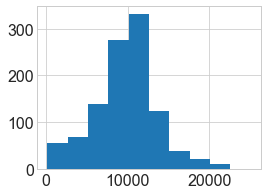

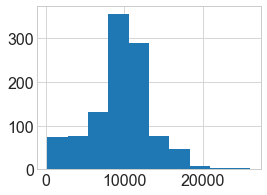

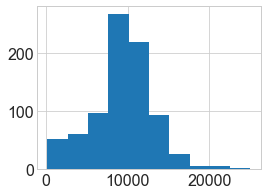

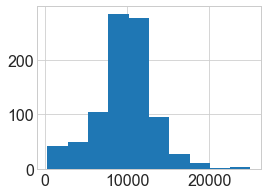

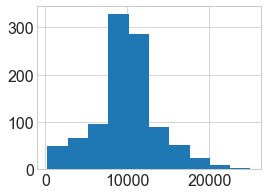

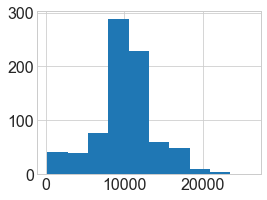

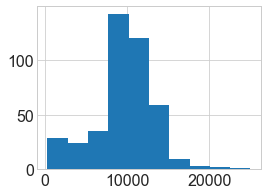

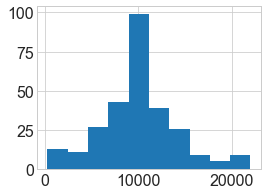

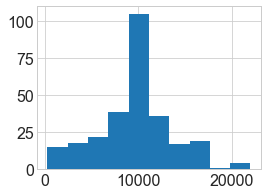

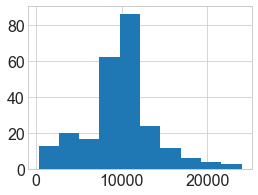

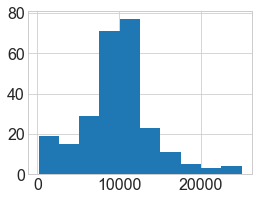

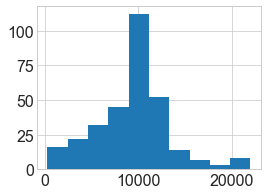

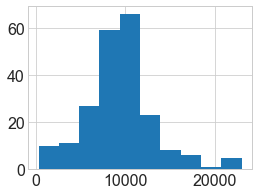

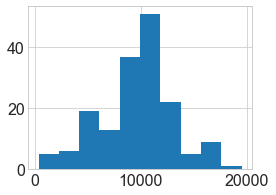

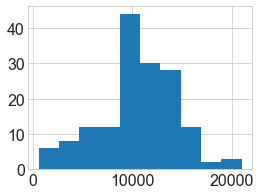

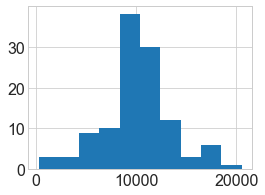

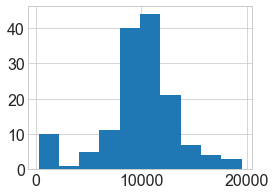

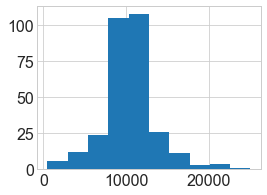

In [76]:
for i in [train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth,
train[train.Approval_time_days==20].Total_Depth,
train[train.Approval_time_days==21].Total_Depth,
train[train.Approval_time_days==22].Total_Depth,
train[train.Approval_time_days==23].Total_Depth,
train[train.Approval_time_days==24].Total_Depth,
train[train.Approval_time_days==25].Total_Depth,
train[train.Approval_time_days==26].Total_Depth,
train[train.Approval_time_days==27].Total_Depth]:
    plt.figure(figsize=(4,3))
    i.hist()
    plt.show()

- These are generally normally distributed

In [83]:
f, p = stats.kruskal(
train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth,
train[train.Approval_time_days==20].Total_Depth,
train[train.Approval_time_days==21].Total_Depth,
train[train.Approval_time_days==22].Total_Depth,
train[train.Approval_time_days==23].Total_Depth,
train[train.Approval_time_days==24].Total_Depth,
train[train.Approval_time_days==25].Total_Depth,
train[train.Approval_time_days==26].Total_Depth,
train[train.Approval_time_days==27].Total_Depth)

f, p

(119.62791789299312, 1.2575903447056126e-13)

In [84]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


- I can proceed with the understanding that the Total_depth by approval time has significant difference from one group to the next.

In [181]:
train.SHALE.value_counts()

PERMIAN BASIN    23272
EAGLE FORD        8027
NONE              4071
BARNETT           1308
HAYNESVILLE       1040
Name: SHALE, dtype: int64

In [161]:
train.SHALE.value_counts().index

Index(['PERMIAN BASIN', 'EAGLE FORD', 'NONE', 'BARNETT', 'HAYNESVILLE'], dtype='object')

In [163]:
shales = ['PERMIAN BASIN', 'EAGLE FORD', 'NONE', 'BARNETT', 'HAYNESVILLE']
for shale in shales:
    print(train[train.SHALE == shale].Approval_time_days.mean())

6.417626332072877
7.038619658652049
6.653893392286907
6.3172782874617734
7.309615384615385


- The Permian Basin is fastest for approval; the Haynesville is slowest.  Stats testing here:

### Running a levene test to check on the variances between the populations above:

- H_0: The variances of the approval times by SHALE are the same in all populations
- H_A: The variance in the populations is different

In [168]:
stats.levene(
train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days,
train[train.SHALE == 'EAGLE FORD'].Approval_time_days,
train[train.SHALE == 'NONE'].Approval_time_days,
train[train.SHALE == 'BARNETT'].Approval_time_days,
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days
)

LeveneResult(statistic=2.2961516754377023, pvalue=0.05666758363395137)

- The null hypothesis cannot be rejected; the variances may be equal

In [172]:
train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days.var(),

(31.996652042393958,)

In [173]:
train[train.SHALE == 'EAGLE FORD'].Approval_time_days.var(),

(31.46698578442854,)

In [174]:
train[train.SHALE == 'NONE'].Approval_time_days.var(),

(33.2435714471085,)

In [175]:
train[train.SHALE == 'BARNETT'].Approval_time_days.var(),

(31.168576519283413,)

In [176]:
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days.var()

36.985855482342664

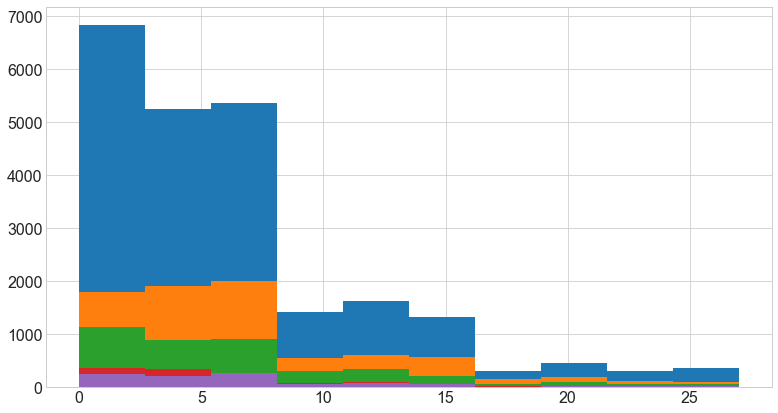

In [178]:
for i in [train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days,
train[train.SHALE == 'EAGLE FORD'].Approval_time_days,
train[train.SHALE == 'NONE'].Approval_time_days,
train[train.SHALE == 'BARNETT'].Approval_time_days,
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days]:
    i.hist()

- also, not normally distributed

### Chi ^ 2 testing to follow:

- H_O: Shale is independent of the number of days to approval
- H_a: Shale plays a role in the length of time to approval

In [188]:
n = train.shape[0]

In [189]:
shale_proportion = train.SHALE.value_counts() / n

In [190]:
shale_proportion

PERMIAN BASIN    0.617000
EAGLE FORD       0.212816
NONE             0.107933
BARNETT          0.034678
HAYNESVILLE      0.027573
Name: SHALE, dtype: float64

In [191]:
approval_time_proportion = train.Approval_time_days.value_counts() / n
approval_time_proportion

1     0.117291
2     0.098918
7     0.089400
6     0.085264
3     0.083011
4     0.073943
5     0.071292
8     0.059494
0     0.059017
9     0.035712
10    0.028342
11    0.028130
14    0.026566
13    0.023729
12    0.021952
15    0.021104
16    0.011241
21    0.008245
27    0.007954
17    0.007450
18    0.007317
20    0.006814
19    0.006549
22    0.005727
23    0.004454
24    0.004162
26    0.003871
25    0.003049
Name: Approval_time_days, dtype: float64

In [192]:
expected = pd.DataFrame()

for shale, s_prop in shale_proportion.iteritems():
    for approval_time, a_prop in approval_time_proportion.iteritems():
        expected.loc[approval_time, shale] = s_prop * a_prop

expected.sort_index(inplace=True)
expected

,PERMIAN BASIN,EAGLE FORD,NONE,BARNETT,HAYNESVILLE
0,0.036413,0.012560,0.006370,0.002047,0.001627
1,0.072369,0.024962,0.012660,0.004067,0.003234
2,0.061033,0.021051,0.010677,0.003430,0.002727
3,0.051218,0.017666,0.008960,0.002879,0.002289
4,0.045623,0.015736,0.007981,0.002564,0.002039
5,0.043987,0.015172,0.007695,0.002472,0.001966
6,0.052608,0.018146,0.009203,0.002957,0.002351
7,0.055160,0.019026,0.009649,0.003100,0.002465
8,0.036708,0.012661,0.006421,0.002063,0.001640
9,0.022035,0.007600,0.003855,0.001238,0.000985


In [193]:
expected *= n
expected

,PERMIAN BASIN,EAGLE FORD,NONE,BARNETT,HAYNESVILLE
0,1373.441646,473.728777,240.257861,77.194125,61.377592
1,2729.607296,941.498701,477.493610,153.417254,121.983138
2,2302.026406,794.017101,402.696352,129.385121,102.875020
3,1931.826502,666.327403,337.936821,108.578079,86.331195
4,1720.812556,593.544276,301.023888,96.718066,76.901214
5,1659.112572,572.262660,290.230633,93.250225,74.143910
6,1984.271488,684.416777,347.111088,111.525744,88.674903
7,2080.523464,717.616098,363.948566,116.935575,92.976298
8,1384.547643,477.559468,242.200647,77.818336,61.873906
9,831.098786,286.663370,145.385148,46.711809,37.140888


In [201]:
observed = pd.crosstab(train.SHALE, train.Approval_time_days).T
observed

SHALE,BARNETT,EAGLE FORD,HAYNESVILLE,NONE,PERMIAN BASIN
Approval_time_days,,,,,
0,85,339,45,318,1439
1,136,767,112,461,2948
2,147,694,87,353,2450
3,147,678,73,299,1934
4,100,621,75,321,1672
5,92,616,69,265,1647
6,105,711,112,362,1926
7,107,789,95,325,2056
8,64,507,70,227,1376


In [202]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

374.8634480788316

In [203]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [204]:
stats.chi2(degrees_of_freedom).sf(chi2)


3.735007644220518e-31

- a miniscule p value; the null hypothesis can be rejected
### The chi^2 test demonstrates that the length of time to approval is related to the shale formation